# Exploratory data analysis

In [1]:
###### invite people for the Kaggle party
import numpy as np
import pandas as pd
import kaggle
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('test_clean.csv')

In [3]:
df.head(10)

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,68.0,11250.0,1.0,7.0,5.0,2001.0,2002.0,162.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3,85.0,11049.0,1.0,8.0,5.0,2007.0,2007.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23,72.0,7226.0,1.0,7.0,5.0,2003.0,2003.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,68.0,9179.0,1.0,7.0,5.0,1999.0,1999.0,158.0,4.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,44,80.0,12984.0,1.0,5.0,6.0,1977.0,1977.0,459.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,60,NaN,9947.0,1.0,7.0,5.0,1990.0,1991.0,0.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,139,60.0,10800.0,1.0,6.0,7.0,1905.0,2000.0,0.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,195,65.0,8200.0,1.0,7.0,5.0,2003.0,2004.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,204,74.0,8556.0,1.0,7.0,5.0,2006.0,2006.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,217,75.0,9464.0,1.0,6.0,7.0,1958.0,1958.0,135.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
df.describe(include='all')

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1453.000000,1189.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,...,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,729.066070,70.026913,10523.802768,0.995848,6.098270,5.579239,1971.088581,1984.826298,102.864360,3.394464,...,0.003460,0.082353,0.002076,0.869204,0.069896,0.002768,0.008304,0.013841,0.820761,0.084429
std,421.629227,24.279953,10025.012467,0.064326,1.386032,1.116539,30.251607,20.665376,181.169308,0.574839,...,0.058742,0.274997,0.045533,0.337294,0.255060,0.052559,0.090781,0.116871,0.383685,0.278126
min,1.000000,21.000000,1300.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,364.000000,59.000000,7535.000000,1.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,729.000000,69.000000,9464.000000,1.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1093.000000,80.000000,11616.000000,1.000000,7.000000,6.000000,2000.000000,2004.000000,162.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,313.000000,215245.000000,1.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()
# too many of these are float64 when they should be intergers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Columns: 257 entries, Id to SaleCondition_Partial
dtypes: float64(256), int64(1)
memory usage: 2.8 MB


In [6]:
# These should all be intergers so I need to change them.
df = df.convert_dtypes()
df

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,68,11250,1,7,5,2001,2002,162,4,...,0,0,0,1,0,0,0,0,1,0
1,3,85,11049,1,8,5,2007,2007,0,4,...,0,0,0,1,0,0,0,0,1,0
2,23,72,7226,1,7,5,2003,2003,0,4,...,0,0,0,1,0,0,0,0,1,0
3,33,68,9179,1,7,5,1999,1999,158,4,...,0,0,0,1,1,0,0,0,0,0
4,44,80,12984,1,5,6,1977,1977,459,3,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1069,<NA>,4928,1,6,5,1976,1976,0,3,...,0,0,0,1,0,0,0,0,1,0
1449,1368,75,7950,1,6,6,1977,1977,140,3,...,0,0,0,1,0,0,0,0,1,0
1450,1450,21,1533,1,5,7,1970,1970,0,3,...,0,0,0,1,1,0,0,0,0,0
1451,1161,50,9000,1,5,6,1880,1991,0,3,...,0,0,0,1,1,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Columns: 257 entries, Id to SaleCondition_Partial
dtypes: Float64(2), Int64(255)
memory usage: 3.2 MB


In [8]:
df['SalePrice'].isna().sum()

8

In [9]:
df[df['SalePrice'].isna()]

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
306,1459,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
575,1460,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
657,1456,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
751,1455,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
863,1454,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
965,1457,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1025,1453,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1435,1458,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [10]:
df.dropna(subset=['SalePrice'],inplace=True)

In [11]:
df['SalePrice'].isna().sum()

0

In [12]:
df[df['LotFrontage'].isna()]

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
5,60,<NA>,9947,1,7,5,1990,1991,0,3,...,0,0,0,1,0,0,0,0,1,0
10,259,<NA>,12925,1,6,7,1970,1970,0,3,...,0,0,0,1,0,0,0,0,1,0
19,691,<NA>,12772,1,6,8,1960,1998,0,3,...,0,0,0,1,0,0,0,0,1,0
24,839,<NA>,8795,1,7,5,2000,2000,0,4,...,0,0,0,1,0,0,0,0,1,0
26,984,<NA>,12800,1,7,5,1989,1989,145,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,1400,<NA>,5062,1,7,5,1984,1984,0,4,...,0,0,0,1,0,0,0,0,1,0
1444,1271,<NA>,3072,1,7,5,2004,2004,18,4,...,0,0,0,1,0,0,0,0,1,0
1447,1024,<NA>,19690,1,6,7,1966,1966,0,4,...,0,0,0,1,0,0,1,0,0,0
1448,1069,<NA>,4928,1,6,5,1976,1976,0,3,...,0,0,0,1,0,0,0,0,1,0


In [13]:
x=df['LotFrontage'].fillna(df['LotFrontage'].median())
print("A peak at the LotFrontage data\n",df['LotFrontage'].describe())
print("If we fill NaN of the LotFrontage with median\n",x.describe())

A peak at the LotFrontage data
 count    1189.000000
mean       70.026913
std        24.279953
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
If we fill NaN of the LotFrontage with median
 count    1445.000000
mean       69.844983
std        22.026289
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [14]:
pd.set_option('display.max_rows', None)
df.isna().sum()

Id                          0
LotFrontage               256
LotArea                     0
Street                      0
OverallQual                 0
OverallCond                 0
YearBuilt                   0
YearRemodAdd                0
MasVnrArea                  0
ExterQual                   0
ExterCond                   0
BsmtQual                   37
BsmtCond                   37
BsmtExposure               38
BsmtFinSF1                  0
BsmtFinSF2                  0
BsmtUnfSF                   0
TotalBsmtSF                 0
HeatingQC                   0
CentralAir                  0
1stFlrSF                    0
2ndFlrSF                    0
LowQualFinSF                0
GrLivArea                   0
BsmtFullBath                0
BsmtHalfBath                0
FullBath                    0
HalfBath                    0
BedroomAbvGr                0
KitchenAbvGr                0
KitchenQual                 0
TotRmsAbvGrd                0
Fireplaces                  0
FireplaceQ

(array([681.,   0.,   0., 644.,   0.,   0., 115.,   0.,   0.,   5.]),
 array([0.0, 0.3, 0.6, 0.8999999999999999, 1.2, 1.5, 1.7999999999999998,
        2.1, 2.4, 2.6999999999999997, 3.0], dtype=object),
 <BarContainer object of 10 artists>)

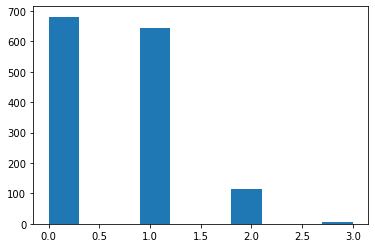

In [15]:
plt.hist(df['Fireplaces'].dropna())

In [16]:
# Some of the values like FireplaceQu has NaN values.  They all are assocaiated with number of fireplaces = 0.  
# Probably best to have the FireplaceQu =0 in this case as it's not missing data but data that is empty b/c it's =0
# Other data that should probably be filled with a 0 is FrontageLot and PoolQual
# Most of the others median may be the best thing to impute for the data

In [17]:
pd.set_option('display.max_rows', 10)


In [18]:
plt.style.use('bmh')

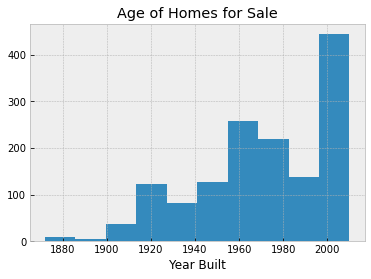

In [19]:
Hist_built=plt.hist(df['YearBuilt'])
Hist_built=plt.xlabel('Year Built')
Hist_built=plt.title('Age of Homes for Sale')
plt.show()

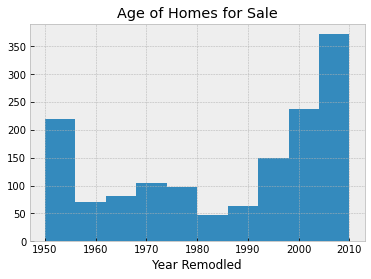

In [20]:
Hist_remod=plt.hist(df['YearRemodAdd'])
Hist_remod=plt.xlabel('Year Remodled')
Hist_remod=plt.title('Age of Homes for Sale')
plt.show()

In [21]:
# huh remodeling wasn't popular in the 1980's  Proably because of the spike in new homes in the 60's-80's?

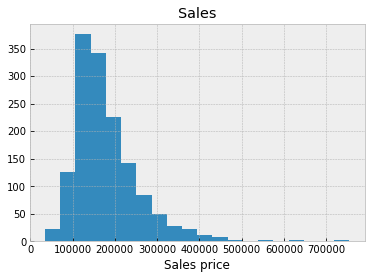

In [22]:
Hist_Sale=plt.hist(df['SalePrice'], bins=20)
Hist_Sale=plt.xlabel('Sales price')
Hist_Sale=plt.title('Sales')
plt.show()

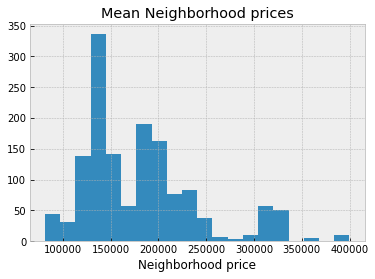

In [23]:
Hist_Neigh=plt.hist(df['NeighborhoodPrice'], bins=20)
Hist_Neigh=plt.xlabel('Neighborhood price')
Hist_Neigh=plt.title('Mean Neighborhood prices')
plt.show()

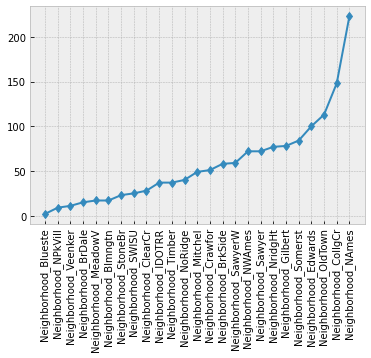

In [24]:
# lets take a look at how many homes were sold in each neighborhood
n=df.filter(like='Neighborhood').drop('NeighborhoodPrice',axis=1).sum()
n=n.sort_values()
_= plt.plot(n, marker='d')
_= plt.xticks(rotation=90)
plt.show()

In [25]:
# The most sales are in NAmes and the least are in Blueste.

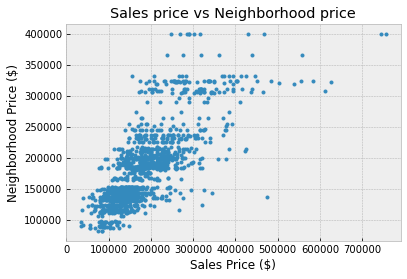

In [26]:
spr=list(df['SalePrice'])
npr=list(df['NeighborhoodPrice'])
_a = plt.plot(spr,npr, linestyle='none',marker='.')
_a = plt.xlabel('Sales Price ($)')
_a = plt.ylabel('Neighborhood Price ($)')
_a = plt.title('Sales price vs Neighborhood price')
plt.show()

In [27]:
df['SalePrice']=df['SalePrice'].astype('float')
df['NeighborhoodPrice']=df['NeighborhoodPrice'].astype('float')

In [28]:
# Had to convert both to float64 instead of Float64 because sns complained.
print(df['SalePrice'].dtype,df['NeighborhoodPrice'].dtype)

float64 float64


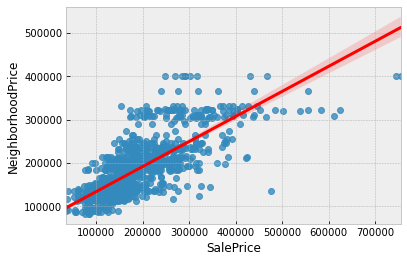

In [29]:
sns.regplot("SalePrice", "NeighborhoodPrice", data=df, line_kws={"color": "red"});

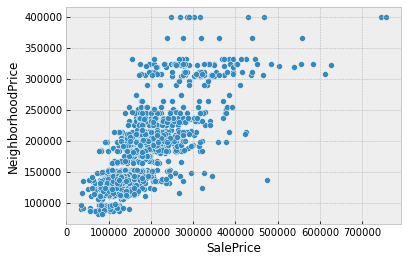

In [30]:
sns.scatterplot(x="SalePrice", y="NeighborhoodPrice", data=df);

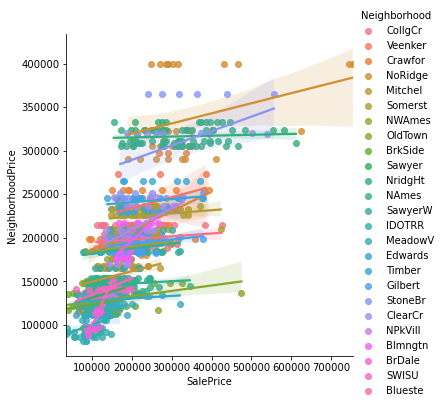

In [31]:
# Strong correlation between neighborhood price and sales price
# What does it look like when we separate out each neighborhood?
# Not to self, was easier to do this with sns when I had the neighborhoods as objects instead of dummy
from IPython.display import display, Image
Image("Price_By_Hood.png")

In [32]:
# Looks more complicated than just neighborhood price dictating sales price
# Some of the neighborhoods are completely flat!

In [33]:
#Let's look at the correlations between each variable.
pd.set_option('display.max_rows', None)
df.corr()

,Id,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,-0.145260,0.051113,-0.006079,0.037251,-0.030486,-0.001629,0.027500,-0.027591,0.003614,...,0.003706,0.005552,0.002644,-0.022548,0.005408,0.019196,0.049314,0.015690,-0.026805,0.005702
LotFrontage,-0.145260,1.000000,0.424739,-0.041163,0.251939,-0.058057,0.122485,0.087384,0.196530,0.178311,...,-0.052017,0.128865,-0.023542,-0.094516,-0.023838,-0.037170,-0.019835,0.016891,-0.076129,0.127083
LotArea,0.051113,0.424739,1.000000,-0.197247,0.106489,-0.005184,0.014621,0.013883,0.105012,0.056224,...,-0.015094,0.020971,-0.005758,-0.002844,-0.029351,-0.013255,0.008910,-0.010873,0.005438,0.023580
Street,-0.006079,-0.041163,-0.197247,1.000000,0.058951,0.043152,0.020830,0.065618,0.017066,0.100511,...,0.003805,0.019344,0.002945,0.006870,0.017701,0.003402,-0.112681,0.007650,-0.002117,0.019609
OverallQual,0.037251,0.251939,0.106489,0.058951,1.000000,-0.092744,0.571981,0.549166,0.408258,0.724890,...,-0.021191,0.325781,-0.058101,-0.224313,-0.103676,-0.041762,-0.045017,-0.025503,-0.140051,0.321586
OverallCond,-0.030486,-0.058057,-0.005184,0.043152,-0.092744,1.000000,-0.376350,0.074325,-0.125265,-0.139367,...,-0.020021,-0.159977,-0.050914,0.166374,-0.047426,-0.039143,-0.033825,-0.024332,0.164923,-0.155362
YearBuilt,-0.001629,0.122485,0.014621,0.020830,0.571981,-0.376350,1.000000,0.590889,0.312676,0.597012,...,-0.023165,0.345337,0.012435,-0.237697,-0.109043,-0.045452,-0.009598,-0.035213,-0.156382,0.342253
YearRemodAdd,0.027500,0.087384,0.013883,0.065618,0.549166,0.074325,0.590889,1.000000,0.177381,0.585415,...,-0.040009,0.323499,-0.011392,-0.182197,-0.136044,-0.040363,-0.020641,-0.048036,-0.116948,0.320644
MasVnrArea,-0.027591,0.196530,0.105012,0.017066,0.408258,-0.125265,0.312676,0.177381,1.000000,0.346026,...,-0.022666,0.170112,-0.025906,-0.132772,-0.043616,-0.011743,-0.013658,-0.009396,-0.084006,0.166513
ExterQual,0.003614,0.178311,0.056224,0.100511,0.724890,-0.139367,0.597012,0.585415,0.346026,1.000000,...,-0.019941,0.390154,-0.031310,-0.269474,-0.098437,-0.036167,-0.049547,-0.050399,-0.181591,0.384969


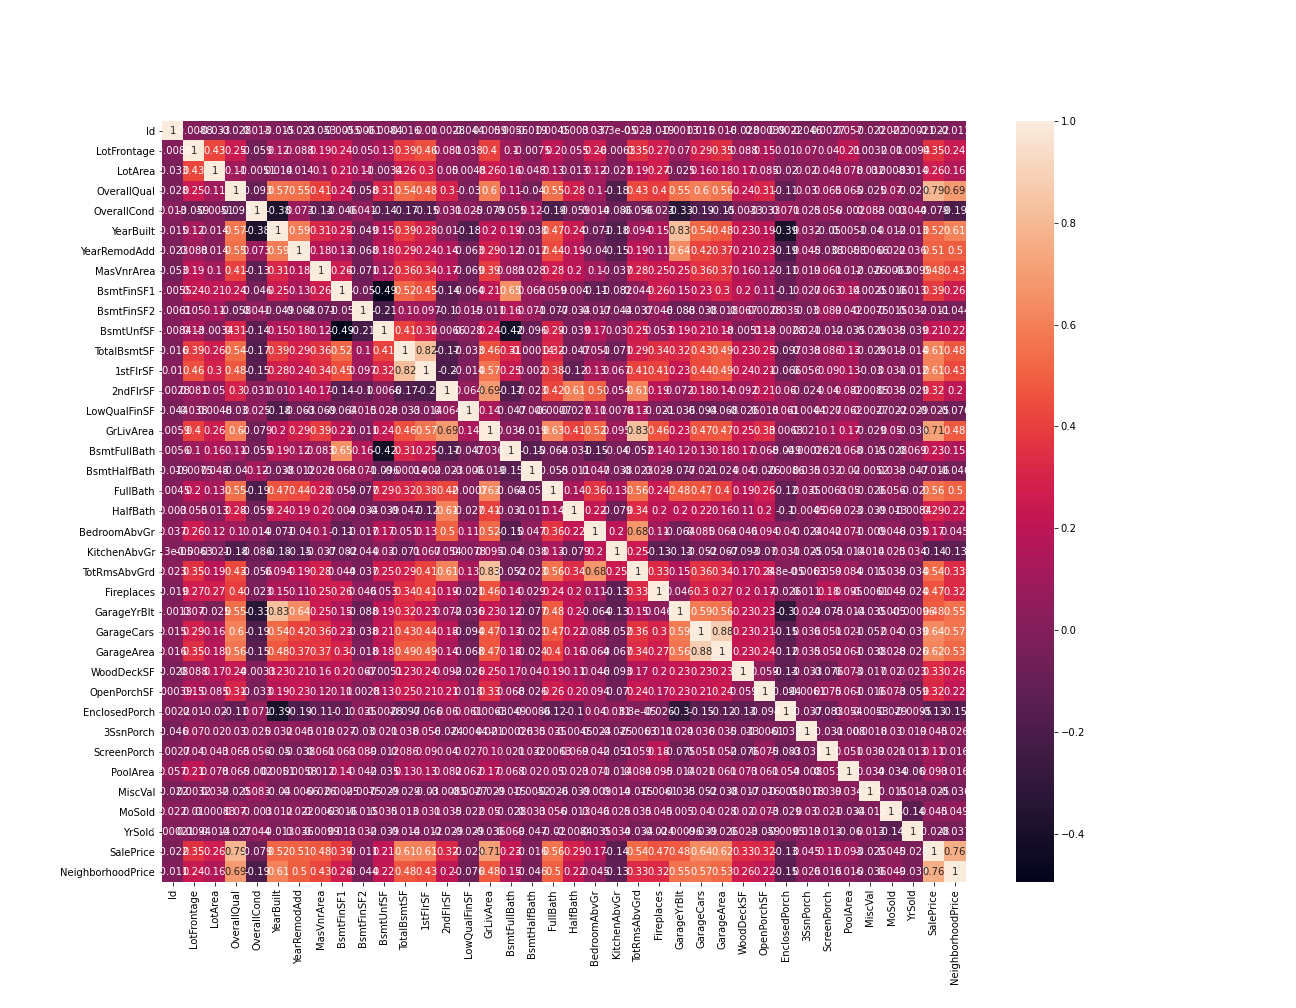

In [34]:
#Looks interesting.  WE can also make that a heatmap
# Note again I did this preprocessing because I didn't have the neighborhoods as dummy variables and 
# 80 variables is easier to look at than 256 
Image("heatmap.png")

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

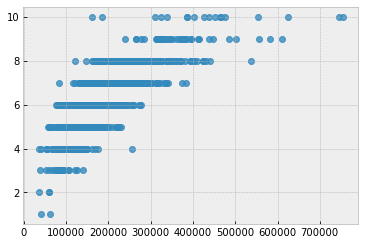

In [35]:
# For SalePrice, the top correlations appear to be OverallQual, GrLivArea, and NeighborhoodPrice
sns.regplot("SalePrice", "OverallQual", data=df, line_kws={"color": "red"});

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

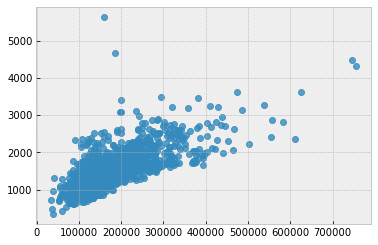

In [36]:
sns.regplot("SalePrice", "GrLivArea", data=df, line_kws={"color": "o"});

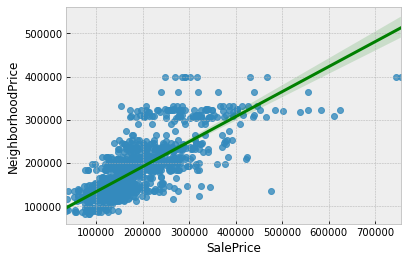

In [37]:
sns.regplot("SalePrice", "NeighborhoodPrice", data=df, line_kws={"color": "g"});

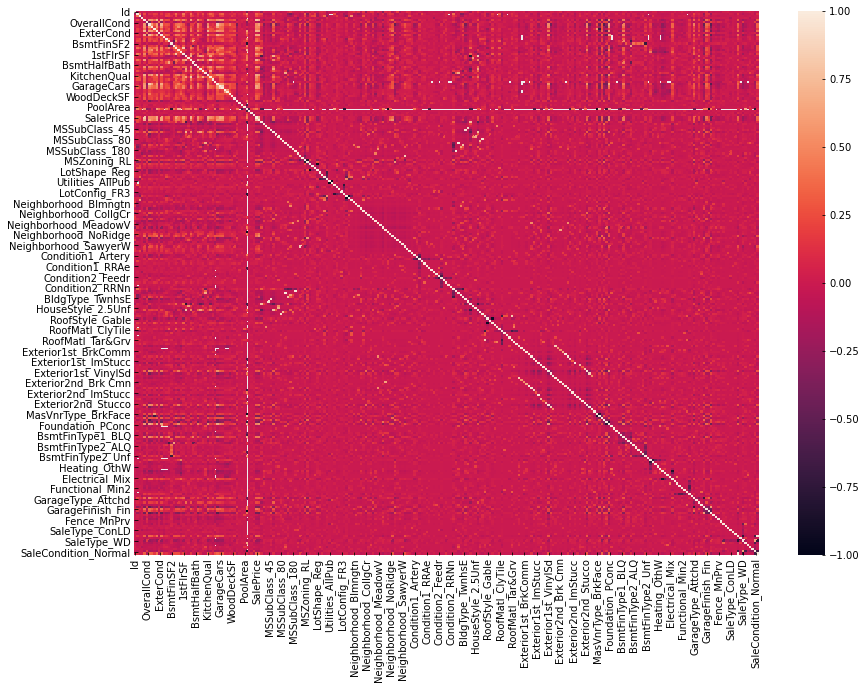

In [38]:
f, ax = plt.subplots(figsize=(14, 10))
ax = sns.heatmap(df.corr())

**can't even read this thing!**

In [39]:
# I'm starting by dropping any NA values, but I've been thinking on filling the NA with the mean value instead
# Interpolating data inbetween each "neighborhood_price" by year for the years not present will be very helpful in their use
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['LotFrontage', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'FireplaceQu', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'PoolQC']


In [40]:
df2=df.drop(columns_with_nan, axis=1)

In [41]:
nan_values[columns_with_nan].sum()

LotFrontage      256
BsmtQual          37
BsmtCond          37
BsmtExposure      38
FireplaceQu      681
GarageYrBlt       81
GarageQual        81
GarageCond        81
PoolQC          1438
dtype: int64

In [46]:
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [60]:
# at this point I really should have already split my data into train and test data.
# lets first try to figure out some PCA of the data to try to narrow down the number of categories we are using
X=df2.drop('SalePrice',axis=1)
Y=df2[['SalePrice']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25) # random_state used for reproducibility
print(X_train.shape, X_test.shape)
print(Y_train.shape,Y_test.shape)

(1083, 247) (362, 247)
(1083, 1) (362, 1)


In [48]:
# Setup regressor
reg_all = LinearRegression()
# Fit the regressor to the training data
reg_all.fit(X_train,Y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, Y_test)))
rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6830900126910321
Root Mean Squared Error: 47415.94784784595


In [50]:
df_predict=reg_all.predict(X_test)
print("X_Test size is:",X_test.size,"\nY_pred size is:",df_predict.size)

X_Test size is: 89414 
Y_pred size is: 362


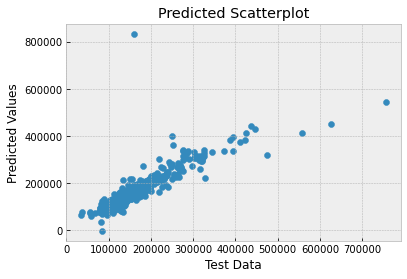

In [52]:
_=plt.scatter(Y_test,df_predict)
_=plt.xlabel('Test Data')
_=plt.ylabel('Predicted Values')
_=plt.title('Predicted Scatterplot')
plt.show()

In [62]:
X2=df2.NeighborhoodPrice
Y2=df2.SalePrice

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.25) # random_state used for reproducibility
print(X2_train.shape, X2_test.shape)
print(Y2_train.shape,Y2_test.shape)

(1083,) (362,)
(1083,) (362,)


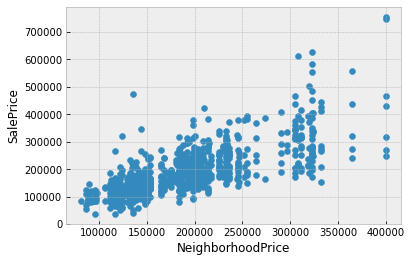

In [63]:
_= plt.scatter(X2_train,Y2_train)
_= plt.xlabel('NeighborhoodPrice')
_= plt.ylabel('SalePrice')
plt.show()

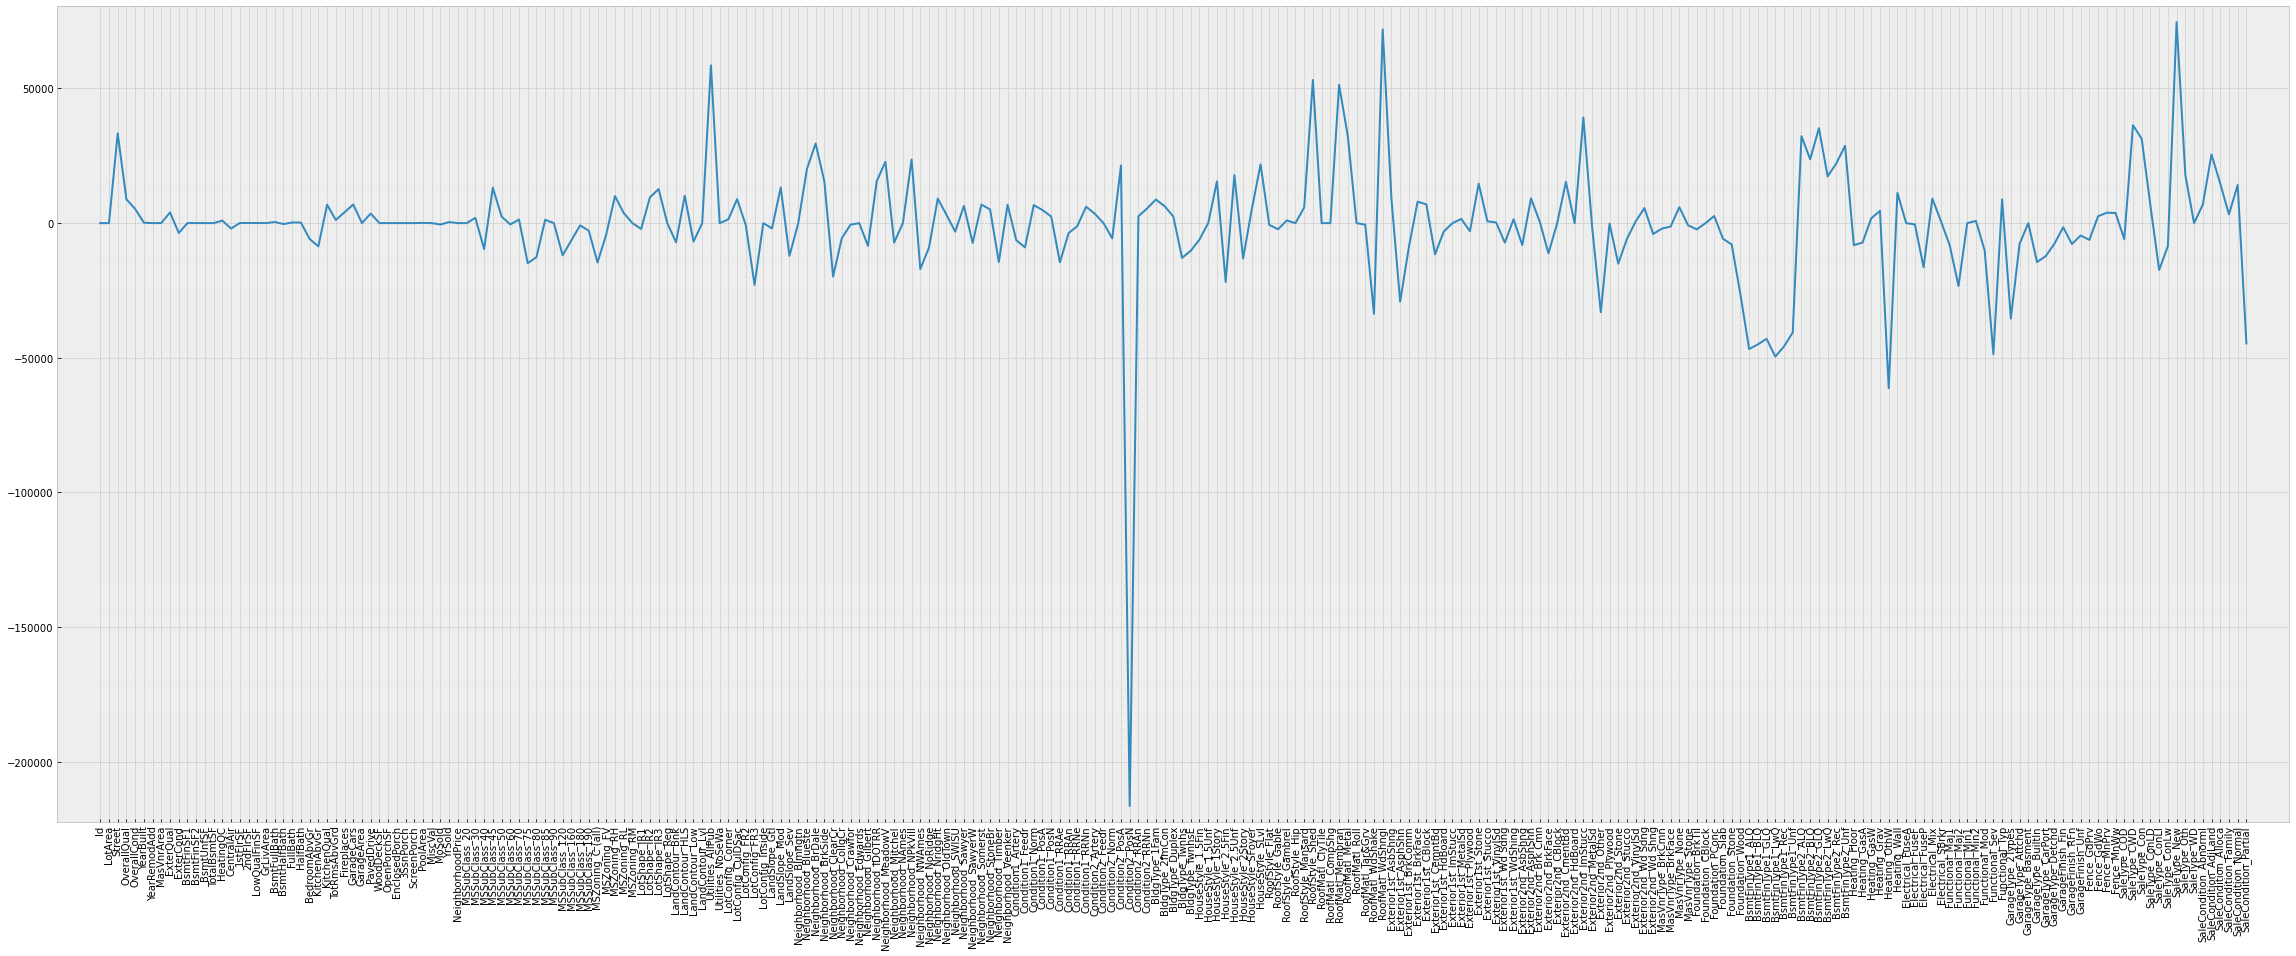

In [75]:
# can use lasso model to try to see which features have the greatest effect on the price
from sklearn.linear_model import Lasso
# Initiate lassor regressor and fit the regressor tothe data
lasso=Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train,Y_train)
# Compute and print the coefficients
lasso_coef=lasso.coef_
# Plot the coefficients
las, ax = plt.subplots(figsize = (40,15))
ax=plt.plot(range(len(X.columns)), lasso_coef)
ax=plt.xticks(range(len(X.columns)), X.columns.values, rotation=90)
ax=plt.margins(0.02)
plt.show()

In [ ]:
# this is interesting.  Being near a park or greenbelt as a second feature has a huge negative effect on the house price
# Street type roof type and being a new home are some of the biggest boosts to the sale value...

In [77]:
las.savefig('Lasso.png')

# PCA Analysis

In [78]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [79]:
pca = PCA(n_components=10)

In [80]:
features=list(df2.drop('SalePrice',axis=1).columns)

In [81]:
pca_df=df2.fillna(0)

In [82]:
# Separating out the features
x = pca_df.loc[:, features].values
# Separating out the target
y = pca_df.loc[:,['SalePrice']].values
# Standardizing the features
x_std = StandardScaler().fit_transform(x)

In [83]:
pca.fit(x_std)

PCA(n_components=10)

In [84]:
print(pca.explained_variance_ratio_)

[0.06312727 0.03126006 0.02571333 0.02116171 0.01856894 0.01727196
 0.01564397 0.01379797 0.01286158 0.01234899]


In [85]:
print(pca.score(x_std))

-332.18738240547447


In [86]:
print('first 10 components account for ',sum(pca.explained_variance_ratio_)*100,"% of the variability")

first 10 components account for  23.175576581221012 % of the variability


This means we can't simplify the data by PCA?

In [87]:
# what if we replace the NaN values with the mode?
pca_df2=df.copy()
for col in columns_with_nan:
    pca_df2[col].fillna(pca_df2[col].mode()[0], inplace=True)

In [88]:
# get the features list
features2=list(pca_df2.drop('SalePrice',axis=1).columns)
# Separating out the features
x2 = pca_df2.loc[:, features2].values
# Separating out the target
y2 = pca_df2.loc[:,['SalePrice']].values
# Standardizing the features
x_std2 = StandardScaler().fit_transform(x2)
pca.fit(x_std2)

PCA(n_components=10)

In [89]:
print(x_std2.mean(),x_std2.std())

8.863536586734922e-17 1.0


In [90]:
print(pca.explained_variance_ratio_)

[0.06625687 0.03102309 0.02587835 0.02120317 0.01845849 0.01695185
 0.01531179 0.0134116  0.01252269 0.012123  ]


In [91]:
print(pca.score(x_std2))

-343.6954287246678


In [92]:
print('first 10 components account for ',sum(pca.explained_variance_ratio_)*100,"% of the variability")

first 10 components account for  23.314091044453626 % of the variability


In [93]:
#replacing the na values with the mode value has a marginaly better outcome

In [94]:
# Since I have already worked in the neighborhood differences by year with my mean neighborhood price, what would happen if I dropped all of the neighborhood data from the model?
drop_list=list(pca_df2.filter(like="Neighborhood").drop('NeighborhoodPrice',axis=1))
drop_list.append('SalePrice')
drop_list.append('Id')
# get the features list
features3=list(pca_df2.drop(drop_list,axis=1).columns)
# Separating out the features
x3 = pca_df2.loc[:, features3].values
# Separating out the target
y3 = pca_df2.loc[:,['SalePrice']].values
# Standardizing the features
x_std3 = StandardScaler().fit_transform(x3)
pca = PCA(n_components=10)
pca.fit(x_std3)

PCA(n_components=10)

In [95]:
print(pca.explained_variance_ratio_)

[0.07029971 0.03217088 0.02717801 0.02208718 0.0191485  0.01769794
 0.01556045 0.01405137 0.01357548 0.01291249]


In [96]:
print('first 10 components account for ',sum(pca.explained_variance_ratio_)*100,"% of the variability")

first 10 components account for  24.468202160768634 % of the variability


In [97]:
# Well it would appear I'm going the right direction

In [98]:
x = pca_df2.loc[:, features].values
x

array([[1, 11250, 1, ..., 0, 1, 0],
       [3, 11049, 1, ..., 0, 1, 0],
       [23, 7226, 1, ..., 0, 1, 0],
       ...,
       [1450, 1533, 1, ..., 0, 0, 0],
       [1161, 9000, 1, ..., 0, 0, 0],
       [1422, 2665, 1, ..., 0, 1, 0]], dtype=object)

In [99]:
print("Shape of array:\n", x_std2.shape)
print("Covariance matrix of x:\n", np.cov(x_std2, rowvar=False))

Shape of array:
 (1445, 256)
Covariance matrix of x:
 [[ 1.00069252 -0.13164986  0.05114813 ...  0.01570073 -0.0268235
   0.00570645]
 [-0.13164986  1.00069252  0.28073863 ...  0.01989244 -0.09026414
   0.14662888]
 [ 0.05114813  0.28073863  1.00069252 ... -0.0108804   0.00544191
   0.02359669]
 ...
 [ 0.01570073  0.01989244 -0.0108804  ...  1.00069252 -0.25368844
  -0.03600047]
 [-0.0268235  -0.09026414  0.00544191 ... -0.25368844  1.00069252
  -0.65026909]
 [ 0.00570645  0.14662888  0.02359669 ... -0.03600047 -0.65026909
   1.00069252]]


In [100]:
# one thing needed for proper PCA is converting the standard scalar to eigenvectors
cov_mat = np.cov(x_std2.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
print('Eigenvectors \n%s' %eig_vecs) 
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.65596170e-03 -4.54144748e-02 -3.48810903e-02 ...  6.60136139e-16
  -1.46066084e-15  3.15459980e-16]
 [-6.72774229e-02  6.01828875e-02 -1.67734896e-01 ... -1.74431285e-15
   4.82033854e-15 -1.07508442e-15]
 [-3.54216785e-02  9.20208300e-02 -1.73908008e-01 ...  1.27782868e-16
  -2.24308220e-15  1.47711437e-16]
 ...
 [ 9.70855420e-03  2.41501962e-03 -7.66031193e-03 ...  4.10477143e-02
  -9.48166416e-02  3.16020666e-02]
 [ 5.25853583e-02  4.47675076e-02 -2.40297696e-02 ...  1.34759309e-01
  -3.11282256e-01  1.03749325e-01]
 [-1.08824581e-01 -7.22331147e-02  4.29563431e-02 ...  9.76846638e-02
  -2.25643058e-01  7.52060694e-02]]

Eigenvalues 
[ 1.69735045e+01  7.94741145e+00  6.62945023e+00  5.43179504e+00
  4.72879503e+00  4.34314191e+00  3.92355144e+00  3.43917339e+00
  3.21701299e+00  3.13604996e+00  3.01537646e+00  2.92777256e+00
  2.80180494e+00  2.72484704e+00  2.74080314e+00  2.64471557e+00
  2.50859440e+00  2.48646544e+00  2.44528353e+00  2.40553606e+00
  2.3678408

In [101]:
print(np.mean(x),np.std(x))
print(x.shape)

825.1315226253031 12123.949092709687
(1445, 247)


In [102]:
#As we know that the sum of the square of each value in an Eigenvector is 1. So let’s see if it holds which mean we have computed Eigenvectors correctly.
sq_eig=[] 
for i in eig_vecs: 
    sq_eig.append(i**2) 
    
print(sum(sq_eig) )
for ev in eig_vecs: np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


AssertionError: 
Arrays are not almost equal to 6 decimals

Mismatched elements: 1 / 1 (100%)
Max absolute difference: 0.01079442
Max relative difference: 0.01091221
 x: array(1.)
 y: array(0.989206)

In [103]:
#Make a list of (eigenvalue, eigenvector) tuples 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))] 

print(type(eig_pairs)) 
    
#Sort the (eigenvalue, eigenvector) tuples from high to low eig_pairs.sort() 
eig_pairs.reverse() 
#print("\n",eig_pairs) 

#Visually confirm that the list is correctly sorted by decreasing eigenvalues 
print('\nEigenvalues in descending order:') 
for i in eig_pairs: 
    print(i[0])

<class 'list'>

Eigenvalues in descending order:
1.7913613821014357e-16
2.367003136685484e-16
6.745969141518523e-16
4.0007006051402324e-16
8.822895015593909e-16
1.7103095502036313e-15
2.3464416559177245e-15
3.23843049659489e-15
2.3702104412015943e-15
2.750115236404807e-15
3.3401755619984105e-15
5.2134056466224175e-15
5.4289926421617836e-15
6.992934250171077e-15
5.6286207784738336e-15
6.928724972515378e-15
8.043666174273918e-15
8.881302974434441e-15
1.1302406606115269e-14
1.0242375719082292e-14
1.4079698505713217e-14
1.1342141654772482e-14
1.5466393022749602e-14
1.6244318804744737e-14
1.6776607031887996e-14
2.142962886508098e-14
2.589353586633768e-14
2.7218715707690025e-14
0.0005038685353439214
0.014939196370534044
0.015434825662802321
0.010230010931753531
0.01772019852898865
0.019944411512036714
0.021485838010838577
0.5462689994240121
0.5467678814104996
0.4842293991132625
0.4867060582528062
0.48940565992846996
0.4063698088781578
0.43643098861741814
0.5351707987591274
0.5426225557280676

In [104]:
# 28 variables have really low eigenvalues... Does this mean 28 of the features are contributing to most of the varience?
pca = PCA(n_components=28)
pca.fit(x_std3)
print('first 28 components account for ',sum(pca.explained_variance_ratio_)*100,"% of the variability")

first 28 components account for  42.516387649485026 % of the variability


In [ ]:
# that certainly made an imporvement.

In [105]:
pd.set_option('display.max_rows', 10)
feat_cols = ['feature'+str(i) for i in range(x_std3.shape[1])]
normalised_data = pd.DataFrame(x_std3,columns=feat_cols)
normalised_data

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229
0,-0.011211,0.072464,0.064572,0.650809,-0.518960,0.989097,0.831325,0.326524,1.053766,-0.239416,...,-0.058926,-0.299572,-0.045612,0.387915,-0.274133,-0.052686,-0.09151,-0.11847,0.467313,-0.303669
1,0.749566,0.052407,0.064572,1.372543,-0.518960,1.187502,1.073360,-0.567977,1.053766,-0.239416,...,-0.058926,-0.299572,-0.045612,0.387915,-0.274133,-0.052686,-0.09151,-0.11847,0.467313,-0.303669
2,0.167795,-0.329071,0.064572,0.650809,-0.518960,1.055232,0.879732,-0.567977,1.053766,-0.239416,...,-0.058926,-0.299572,-0.045612,0.387915,-0.274133,-0.052686,-0.09151,-0.11847,0.467313,-0.303669
3,-0.011211,-0.134191,0.064572,0.650809,-0.518960,0.922962,0.686105,0.304437,1.053766,-0.239416,...,-0.058926,-0.299572,-0.045612,0.387915,3.647867,-0.052686,-0.09151,-0.11847,-2.139895,-0.303669
4,0.525808,0.245491,0.064572,-0.792659,0.376975,0.195476,-0.378847,1.966442,-0.686453,-0.239416,...,-0.058926,-0.299572,-0.045612,0.387915,-0.274133,-0.052686,-0.09151,-0.11847,0.467313,-0.303669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,-0.369224,-0.558377,0.064572,-0.070925,-0.518960,0.162409,-0.427253,-0.567977,-0.686453,-0.239416,...,-0.058926,-0.299572,-0.045612,0.387915,-0.274133,-0.052686,-0.09151,-0.11847,0.467313,-0.303669
1441,0.302050,-0.256827,0.064572,-0.070925,0.376975,0.195476,-0.378847,0.205049,-0.686453,-0.239416,...,-0.058926,-0.299572,-0.045612,0.387915,-0.274133,-0.052686,-0.09151,-0.11847,0.467313,-0.303669
1442,-2.114537,-0.897148,0.064572,-0.792659,1.272909,-0.035997,-0.717695,-0.567977,-0.686453,-0.239416,...,-0.058926,-0.299572,-0.045612,0.387915,3.647867,-0.052686,-0.09151,-0.11847,-2.139895,-0.303669
1443,-0.816740,-0.152053,0.064572,-0.792659,0.376975,-3.012075,0.298850,-0.567977,-0.686453,-0.239416,...,-0.058926,-0.299572,-0.045612,0.387915,3.647867,-0.052686,-0.09151,-0.11847,-2.139895,-0.303669


In [106]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pca_df[['SalePrice']]], axis = 1)

ValueError: ('Lengths must match to compare', (1453,), (247,))

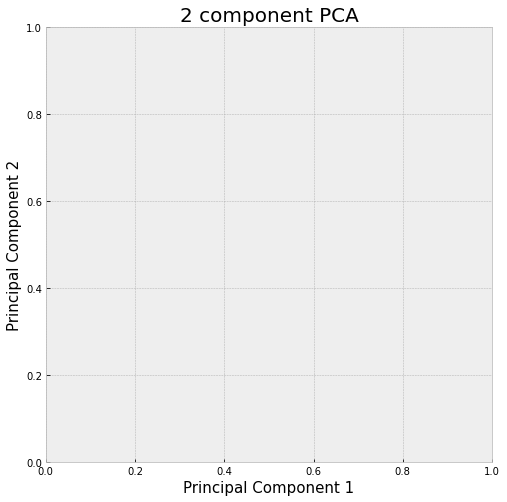

In [107]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [features]
colors = ['jet']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['SalePrice'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Random Forest Test

# Gradient Boost Test